In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Evaluacion 3: Cassia Dafoe


## Ejercicios de Pandas



In [2]:
# para mostrar todas las columnas
pd.options.display.max_columns=None

In [57]:
df = pd.read_csv('../datos/Spotify_Youtube.csv', index_col=0)

In [4]:
df.head(3)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,"0,695","0,923","1,0","-3,93","0,0522","0,0425","0,0469",0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [5]:
def exploracion(dataframe, nombre):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(f"Exploracion del dataframe '{nombre}'")
    print(".............................................")
    print(f"Las primeras 5 filas:")
    display(dataframe.head())
    print(".............................................")
    print(f"Las últimas 5 filas:")
    display(dataframe.head())
    print(".............................................")
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(df.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(df.isnull().sum().reset_index())
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe())
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object))
    print(".............................................")
    

In [6]:
exploracion(df, "Spotify and Youtube Song Data")

Exploracion del dataframe 'Spotify and Youtube Song Data'
.............................................
Las primeras 5 filas:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,"0,695","0,923","1,0","-3,93","0,0522","0,0425","0,0469",0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,"0,689","0,739","2,0","-5,81","0,026","1,51e-05","0,509",0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,"0,663","0,694","10,0","-8,627","0,171","0,0253","0,0",0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


.............................................
Las últimas 5 filas:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,"0,695","0,923","1,0","-3,93","0,0522","0,0425","0,0469",0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,"0,689","0,739","2,0","-5,81","0,026","1,51e-05","0,509",0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,"0,663","0,694","10,0","-8,627","0,171","0,0253","0,0",0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


.............................................
5 filas aleatorias:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
13226,ONE OK ROCK,https://open.spotify.com/artist/7k73EtZwoPs516...,Save Yourself,Luxury Disease,album,spotify:track:5D5fiDX8MhK3lfHJmZZmpt,"0,503","0,849","5,0","-2,709","0,0615","0,00428","0,0",0.0667,0.762,165.096,197995.0,https://www.youtube.com/watch?v=3Fxzu6Jbrww,ONE OK ROCK - SAVE YOURSELF [OFFICIAL VIDEO],Fueled By Ramen,2939351.0,61444.0,1627.0,"ONE OK ROCK's official music video for ""SAVE Y...",True,True,1.852265e+07
8811,Simple Minds,https://open.spotify.com/artist/6hN9F0iuULZYWX...,Don't You Forget About Me,Don't You Forget About Me,single,spotify:track:4K21nchEz8gMXTuW5vAd1c,"0,654","0,71","2,0","-7,07","0,0243","0,00791","0,0217",0.1800,0.471,111.011,259582.0,https://www.youtube.com/watch?v=CdqoNKCCt7A,Simple Minds - Don't You (Forget About Me),SimpleMindsVEVO,258090694.0,1396487.0,54123.0,REMASTERED IN HD!\n \nListen to more Simple Mi...,True,True,1.066794e+07
8317,Pixies,https://open.spotify.com/artist/6zvul52xwTWzil...,Where Is My Mind? - Remastered,Surfer Rosa,album,spotify:track:7wCmS9TTVUcIhRalDYFgPy,"0,519","0,441","4,0","-14,178","0,0353","0,0204","0,000453",0.0760,0.250,81.334,234973.0,https://www.youtube.com/watch?v=N3oCS85HvpY,Pixies - Where Is My Mind,i'm cyborg but that's ok,100043781.0,1571155.0,34635.0,DISCLAIMER: I dont monetize my videos with som...,False,False,6.188484e+08
16758,Alec Benjamin,https://open.spotify.com/artist/5IH6FPUwQTxPSX...,Let Me Down Slowly,Narrated For You,album,spotify:track:2qxmye6gAegTMjLKEBoR3d,"0,652","0,557","1,0","-5,714","0,0318","0,74","0,0",0.1240,0.483,150.073,169354.0,https://www.youtube.com/watch?v=50VNCymT-Cs,Alec Benjamin - Let Me Down Slowly [Official M...,Alec Benjamin,451014608.0,6738842.0,104886.0,Shop 'These Two Windows' merch: https://alecbe...,True,True,1.215188e+09
11952,Capo,https://open.spotify.com/artist/5y9wg9qkGBl0n9...,Lambo Diablo GT (feat. Nimo & Juju) - Remix,Lambo Diablo GT (feat. Nimo & Juju) [Remix],single,spotify:track:3TMW1GOB1lsmvf8er2dE8g,"0,722","0,731","11,0","-7,461","0,0702","0,445","6,19e-06",0.1500,0.539,114.997,317902.0,https://www.youtube.com/watch?v=_b61hg8UlZM,CAPO – Lambo Diablo GT feat. Nimo (prod. Von S...,Capo TV,34368607.0,192215.0,4458.0,"""ALLES AUF ROT"" HIER KAUFEN / STREAMEN:\n► htt...",True,True,6.625246e+07


.............................................
En el dataframe hay 20718 filas y 27 columnas.
.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,Artist,object
1,Url_spotify,object
2,Track,object
3,Album,object
4,Album_type,object
5,Uri,object
6,Danceability,object
7,Energy,object
8,Key,object
9,Loudness,object


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,Artist,0
1,Url_spotify,0
2,Track,0
3,Album,0
4,Album_type,0
5,Uri,0
6,Danceability,2
7,Energy,2
8,Key,2
9,Loudness,2


.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


.............................................
Los principales estadísticos de las columnas categóricas son:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Url_youtube,Title,Channel,Description,Licensed,Official_video
count,20718,20718,20718,20718,20718,20718,20716,20716,20716,20716,20716,20716,20716,20248,20248,20248,19842,20248,20248
unique,2079,2079,17841,11937,3,18862,898,1268,12,9417,1303,3138,4012,18154,18146,6714,17395,2,2
top,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,El Ultimo Adiós - Varios Artistas Version,Greatest Hits,album,spotify:track:0tzixmHNQfE6S6SirSToxW,"0,687","0,572","0,0","-7,818","0,0324","0,114","0,0",https://www.youtube.com/watch?v=GqOvxbFLwjY,Color Esperanza 2020 - Various Artists (Offici...,T-Series,,True,True
freq,10,10,24,30,14926,24,78,60,2305,25,72,50,9391,18,18,238,114,14140,15723


.............................................


3. Preparación de los datos:

- Los nombres de las columnas empiezan con mayúsculas, poned todos los nombres de las columnas en minúsculas.

In [58]:
# cambiamos los nombres de las columnas a minusculas con un dict comprehension

diccionario = {col : col.lower() for col in df.columns}

df.rename(columns = diccionario, inplace = True)

df.columns

Index(['artist', 'url_spotify', 'track', 'album', 'album_type', 'uri',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'url_youtube', 'title', 'channel', 'views', 'likes',
       'comments', 'description', 'licensed', 'official_video', 'stream'],
      dtype='object')

- Haciendo el análisis exploratorio nos deberíamos haber dado cuenta de que algunas de las variables (danceability, energy, key, loudness, speechiness, acousticness, instrumentalness) no son del tipo que deberían. Esto es debido a que los decimales están establecidos como comas y no con puntos. Cread una función que nos permita cambiar esas comas por puntos para que los datos tengan el tipo correcto.

In [59]:
def tipo_float(columna):
    try:
        columna = columna.replace(",", ".")
        return float(columna)
    except:
        return columna

In [60]:
def columna_float(dataframe):
    for column in dataframe:
        dataframe[column] = dataframe[column].apply(tipo_float)
    display(dataframe.dtypes.reset_index())

In [61]:
columna_float(df)

,index,0
0,artist,object
1,url_spotify,object
2,track,object
3,album,object
4,album_type,object
5,uri,object
6,danceability,float64
7,energy,float64
8,key,float64
9,loudness,float64


- Hay algunas canciones cuyo título está en mayúsulas. Crea una función para que todos los títulos estén en minúscula. Haced lo mismo para las columnas de "track" y "album".

In [62]:
def lower(columna):
    try:
        return columna.lower()
    except:
        return columna

In [63]:
def columna_lower(dataframe, *columnas):
    '''
    Recibe un dataframe y una lista de columnas del dataframe, 
    cambia los valores tipo string de las columnas a minúsculas, 
    y muestra las tres primeras lineas del dataframe para ver el resultado.
    '''
    for col in columnas:
        dataframe[col] = dataframe[col].apply(lower)
    display(dataframe.head(3))

In [64]:
columna_lower(df, *['track', 'album'])

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,feel good inc.,demon days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.82,0.70,6.00,-6.68,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",Official HD Video for Gorillaz' fantastic trac...,True,True,"1,040,234,854.00"
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,rhinestone eyes,plastic beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.68,0.70,8.00,-5.82,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",The official video for Gorillaz - Rhinestone E...,True,True,"310,083,733.00"
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,-3.93,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"


- Algunos de los artistas tienen símbolos raros, en concreto el símbolo $. Cread una función que nos elimine este símbolo de los nombres de los artistas.

In [65]:
# vemos unos ejemplos de artistas con un $ en el nombre
df_dollar = df[df['artist'].astype(str).str.contains("\$", regex=True, na=False)]
df_dollar.head(3)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
5332,Too $hort,https://open.spotify.com/artist/4sb7rZNN93BSS6...,blow the whistle,blow the whistle,album,spotify:track:2lMg3lCMOGistaWBNGjuT3,0.91,0.62,1.00,-5.56,0.20,0.00,0.00,0.15,0.60,99.92,"163,133.00",https://www.youtube.com/watch?v=CBJtzEKetBM,TOO SHORT - Blow The Whistle (Official HD Video),TooShortVEVO,"55,688,289.00","369,856.00","9,781.00",Official HD video for “Blow The Whistle” by To...,True,True,"72,987,947.00"
5333,Too $hort,https://open.spotify.com/artist/4sb7rZNN93BSS6...,gettin' it (feat. parliament funkadelic),gettin' it (album number ten),album,spotify:track:5K5dQsYdSdo2LKdepxbYAd,0.90,0.41,1.00,-5.31,0.22,0.18,0.00,0.12,0.65,84.07,"341,427.00",https://www.youtube.com/watch?v=8wDziTMsA9k,Too $hort - Gettin' It (Official Video) ft. Pa...,TooShortVEVO,"3,477,753.00","60,777.00",737.00,"Official Video for ""Gettin' It"" by Too $hort\n...",True,True,"58,456,976.00"
5334,Too $hort,https://open.spotify.com/artist/4sb7rZNN93BSS6...,big subwoofer (feat. snoop dogg. ice cube. e-4...,big subwoofer,single,spotify:track:5GPm7PsMQwceQvfYlGXcCt,0.92,0.55,11.00,-5.91,0.26,0.03,0.00,0.20,0.71,90.00,"241,587.00",https://www.youtube.com/watch?v=tqiXwx0NG0Q,MOUNT WESTMORE – Big Subwoofer (Official Music...,SnoopDoggTV,"29,491,847.00","485,400.00","18,232.00",Stream/Download “Big Subwoofer”: https://Snoop...,False,False,"17,541,227.00"


In [66]:
def dollar(columna):
    try:
        patron = "\$"
        return re.sub(patron, "", columna)
    except:
        return columna

In [67]:
# aplico la funcion a la columna "artist"
df['artist'] = df['artist'].apply(dollar)

In [68]:
# compruebo que ya no hay artistas con $
df_dollar2 = df[df['artist'].astype(str).str.contains("\$", regex=True, na=False)]
df_dollar2.head(3)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream


4. Filtrado de datos y Visualización:

- ¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?

In [69]:
df['album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [70]:
df_album = df[df['album_type'] == 'album']

display(df_album.head(2))

print(f"Hay {df_album.shape[0]} canciones en la categoria de album type 'album'")

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,feel good inc.,demon days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.82,0.70,6.00,-6.68,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",Official HD Video for Gorillaz' fantastic trac...,True,True,"1,040,234,854.00"
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,rhinestone eyes,plastic beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.68,0.70,8.00,-5.82,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",The official video for Gorillaz - Rhinestone E...,True,True,"310,083,733.00"


Hay 14926 canciones en la categoria de album type 'album'


In [71]:
df_single = df[df['album_type'] == 'single']

display(df_single.head(2))

print(f"Hay {df_single.shape[0]} canciones en la categoria de album type 'single'")

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,-3.93,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown) ...,new gold (feat. tame impala and bootie brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.00,-7.18,0.06,0.01,0.26,0.33,0.36,127.03,"274,142.00",https://www.youtube.com/watch?v=BONNm0F7Tto,Gorillaz - New Gold ft. Tame Impala. Bootie Br...,Dom Dolla,"451,996.00","11,686.00",241.00,Gorillaz 'New Gold' ft. Tame Impala. Bootie Br...,False,True,"10,666,154.00"


Hay 5004 canciones en la categoria de album type 'single'


In [72]:
df_compilation = df[df['album_type'] == 'compilation']

display(df_compilation.head(2))

print(f"Hay {df_compilation.shape[0]} canciones en la categoria de album type 'compilation'")

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
154,Shakira,https://open.spotify.com/artist/0EmeFodog0BfCg...,waka waka (this time for africa) [the official...,listen up! the official 2010 fifa world cup album,compilation,spotify:track:6bNB5gxFX6Q87DbQWb8OWZ,0.76,0.87,2.00,-6.41,0.15,0.01,0.00,0.07,0.75,126.99,"202,627.00",https://www.youtube.com/watch?v=pRpeEdMmmQ0,Shakira - Waka Waka (This Time for Africa) (Th...,shakiraVEVO,"3,463,816,330.00","20,327,883.00","1,283,529.00","Watch the official music video for ""Waka Waka ...",True,True,"629,918,488.00"
206,Sean Paul,https://open.spotify.com/artist/3Isy6kedDrgPYo...,(when you gonna) give it up to me (feat. keysh...,only hits,compilation,spotify:track:6k8uthjEbttfWXcGaNTQGD,0.71,0.76,8.00,-3.04,0.23,0.07,0.00,0.04,0.72,95.82,"243,880.00",https://www.youtube.com/watch?v=bMoNV9oWs2E,Sean Paul - Give It Up To Me (feat. Keyshia Co...,Atlantic Records,"306,887,054.00","1,317,175.00","17,399.00","The official video of ""Give It Up To Me (feat....",True,True,"51,339,097.00"


Hay 788 canciones en la categoria de album type 'compilation'


- Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [23]:
# genero un dataframe con la media y desviación estándar de la métrica 'danceability' para cada artista
df_danceability = df.groupby('artist', dropna=True)['danceability'].agg(['mean', 'std']).sort_values('mean', ascending=False)
df_danceability

,mean,std
artist,,
Saweetie,0.89,0.05
Young Dolph,0.86,0.05
Megan Thee Stallion,0.86,0.09
Dave,0.86,0.10
Ovy On The Drums,0.85,0.04
...,...,...
Stephen Cleobury,0.14,0.04
Ocean Sounds,0.14,0.06
Ocean Waves For Sleep,0.13,0.06


In [73]:
# genero un dataframe con la media y desviación estándar de la métrica 'acousticness' para cada artista
df_acousticness = df.groupby('artist', dropna=True)['acousticness'].agg(['mean', 'std']).sort_values('mean', ascending=False)
df_acousticness

,mean,std
artist,,
Claude Debussy,0.99,0.00
Robert Schumann,0.99,0.01
Frédéric Chopin,0.99,0.00
Edvard Grieg,0.99,0.01
Lang Lang,0.99,0.00
...,...,...
Youjeen,0.00,0.00
Volbeat,0.00,0.00
Motionless In White,0.00,0.00


In [25]:
# genero un dataframe con la media y desviación estándar de la métrica 'speechiness' para cada artista
df_speechiness = df.groupby('artist', dropna=True)['speechiness'].agg(['mean', 'std']).sort_values('mean', ascending=False)
df_speechiness

,mean,std
artist,,
Sir Arthur Conan Doyle,0.95,0.01
Bibi Blocksberg,0.95,0.01
Sherlock Holmes,0.94,0.02
TKKG,0.92,0.02
Fünf Freunde,0.91,0.05
...,...,...
Marcela Gandara,0.03,0.00
Los Temerarios,0.03,0.01
Jeet Gannguli,0.03,0.00


- Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:
    - Agrupar por artista y calcular la media de visitas y de likes.

In [26]:
# genero un dataframe que agrupa las artistas y muestra la media de cada valor; de allí saco un dataframe limitado a views y likes
df_group_artists = df.groupby('artist').mean()
df_mean_views_likes = df_group_artists.loc[:,'views':'likes']
df_mean_views_likes

/tmp/ipykernel_2349/2970917194.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_artists = df.groupby('artist').mean()


,views,likes
artist,,
112.0,"21,913,445.90","150,914.10"
$NOT,"11,078,490.30","274,716.30"
$uicideboy$,"33,413,510.80","357,662.10"
(G)I-DLE,"175,495,394.10","2,446,296.30"
*NSYNC,"102,783,286.20","423,342.30"
...,...,...
will.i.am,"283,132,016.60","1,386,447.10"
Ángela Aguilar,"138,529,529.10","1,029,475.70"
Ñejo,"62,668,082.40","434,891.00"


In [27]:
print(f"La media de views por artista es {df_mean_views_likes['views'].mean().round(2)} y la media de likes es {df_mean_views_likes['views'].mean().round(2)}")

La media de views por artista es 93090984.46 y la media de likes es 93090984.46


- Quedaros con los 10 artistas que más visitas han tenido.
- Quedaros con los 10 artistas que más likes han tenido.

In [28]:
# genero un dataframe de los 10 artistas con mas visitas
df_topten_views = df.groupby('artist')['views'].sum().sort_values(ascending=False).iloc[:10].reset_index()

In [29]:
df_topten_views

,artist,views
0,Ed Sheeran,"15,460,207,769.00"
1,CoComelon,"14,601,671,211.00"
2,Katy Perry,"13,120,632,075.00"
3,Charlie Puth,"12,167,594,191.00"
4,Luis Fonsi,"11,628,113,031.00"
5,Justin Bieber,"10,991,060,236.00"
6,Daddy Yankee,"10,871,926,842.00"
7,Bruno Mars,"10,240,919,227.00"
8,Macklemore & Ryan Lewis,"10,122,055,560.00"
9,Coldplay,"9,997,277,884.00"


In [30]:
# genero un dataframe de los 10 artistas con mas likes
df_topten_likes = df.groupby('artist')['likes'].sum().sort_values(ascending=False).iloc[:10].reset_index()
df_topten_likes

,artist,likes
0,BTS,"139,403,808.00"
1,BLACKPINK,"132,302,505.00"
2,Charlie Puth,"86,336,925.00"
3,Ed Sheeran,"83,543,319.00"
4,Justin Bieber,"78,584,348.00"
5,Billie Eilish,"73,338,537.00"
6,Imagine Dragons,"72,274,477.00"
7,Alan Walker,"67,977,702.00"
8,DJ Snake,"67,775,831.00"
9,Luis Fonsi,"66,908,489.00"


- Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.
- BONUS Haced lo mismo para los datos de tipo "single".

Text(0.5, 0.98, "Los 10 Artistas de Spotify con mas Visitas y 'Me gustas' en Youtube")

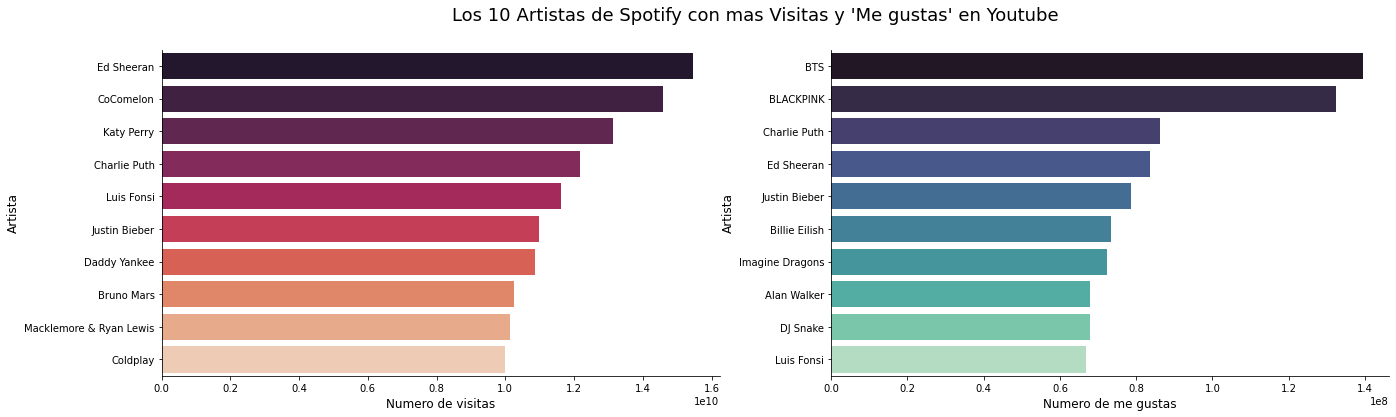

In [31]:
# genero dos graficas, una para cada dataframe
fig, ax = plt.subplots(1, 2, figsize = (22,6))

sns.barplot(y = 'artist', x = 'views', data = df_topten_views, ax = ax[0], palette='rocket')
sns.barplot(y = 'artist', x = 'likes', data = df_topten_likes, ax = ax[1], palette='mako')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].set_xlabel('Numero de visitas', fontsize = 12) 
ax[0].set_ylabel('Artista', fontsize = 12)
ax[1].set_xlabel('Numero de me gustas', fontsize = 12) 
ax[1].set_ylabel('Artista', fontsize = 12)


fig.suptitle("Los 10 Artistas de Spotify con mas Visitas y 'Me gustas' en Youtube", fontsize = 18)


In [32]:
# para crear las mismas graficas para canciones tipo 'single', primero genero un dataframe filtrado por ese tipo
df_singles = df[df['album_type'] == 'single']
df_singles.head(2)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,-3.93,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown) ...,new gold (feat. tame impala and bootie brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.00,-7.18,0.06,0.01,0.26,0.33,0.36,127.03,"274,142.00",https://www.youtube.com/watch?v=BONNm0F7Tto,Gorillaz - New Gold ft. Tame Impala. Bootie Br...,Dom Dolla,"451,996.00","11,686.00",241.00,Gorillaz 'New Gold' ft. Tame Impala. Bootie Br...,False,True,"10,666,154.00"


In [33]:
df_singles['album_type'].unique()

array(['single'], dtype=object)

In [34]:
# creo otro dataframe agrupando por artista, ordenando por views y limitando a los 10 mas altos
df_topten_views_singles = df_singles.groupby('artist')['views'].sum().sort_values(ascending=False).iloc[:10].reset_index()
df_topten_views_singles

,artist,views
0,BLACKPINK,"7,329,516,365.00"
1,Wiz Khalifa,"6,761,549,938.00"
2,Charlie Puth,"5,870,178,991.00"
3,Calvin Harris,"5,486,693,460.00"
4,Ozuna,"5,296,918,545.00"
5,PSY,"5,041,210,565.00"
6,Jubin Nautiyal,"4,525,858,852.00"
7,Natti Natasha,"3,946,033,762.00"
8,Tanishk Bagchi,"3,774,838,809.00"
9,Darell,"3,708,414,010.00"


In [35]:
# creo otro dataframe agrupando por artista, ordenando por likes y limitando a los 10 mas altos
df_topten_likes_singles = df_singles.groupby('artist')['likes'].sum().sort_values(ascending=False).iloc[:10].reset_index()
df_topten_likes_singles

,artist,likes
0,BLACKPINK,"82,959,030.00"
1,Wiz Khalifa,"47,790,517.00"
2,Charlie Puth,"41,746,947.00"
3,Jubin Nautiyal,"39,238,542.00"
4,Lil Nas X,"39,103,751.00"
5,Marshmello,"35,843,277.00"
6,Billie Eilish,"35,590,580.00"
7,Bizarrap,"33,922,836.00"
8,Selena Gomez,"33,409,887.00"
9,Ozuna,"33,337,259.00"


Text(0.5, 0.98, "Los 10 Artistas de Spotify con mas Visitas y 'Me gustas' en Youtube en Singles")

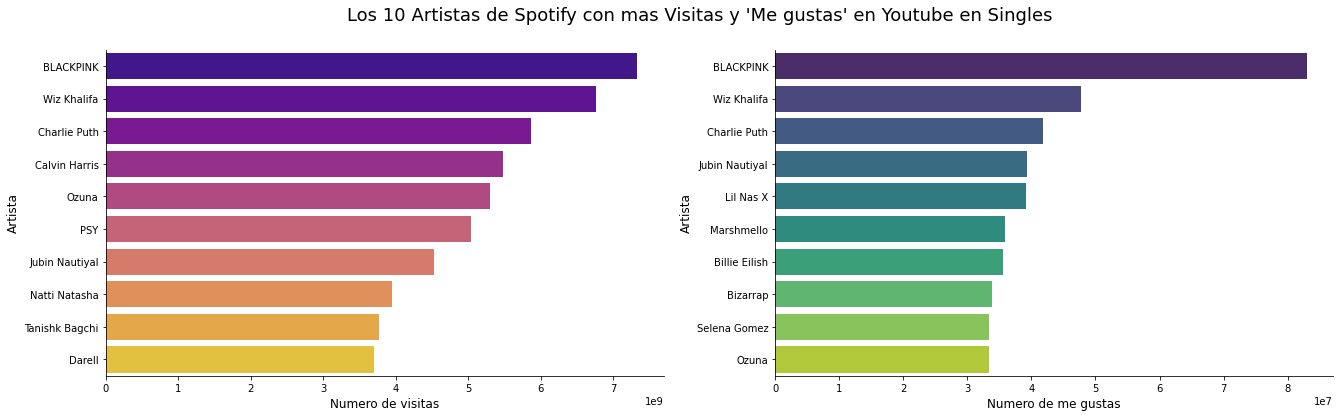

In [36]:
# genero una grafica para cada dataframe de singles
fig, ax = plt.subplots(1, 2, figsize = (22,6))

sns.barplot(y = 'artist', x = 'views', data = df_topten_views_singles, ax = ax[0], palette='plasma')
sns.barplot(y = 'artist', x = 'likes', data = df_topten_likes_singles, ax = ax[1], palette='viridis')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].set_xlabel('Numero de visitas', fontsize = 12) 
ax[0].set_ylabel('Artista', fontsize = 12)
ax[1].set_xlabel('Numero de me gustas', fontsize = 12) 
ax[1].set_ylabel('Artista', fontsize = 12)


fig.suptitle("Los 10 Artistas de Spotify con mas Visitas y 'Me gustas' en Youtube en Singles", fontsize = 18)

- Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:
    - Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".

In [37]:
# creo un dataframe filtrando por canciones con el substring "feat." en su título
df_colab = df[df['track'].str.contains('feat', regex=True, na=False)]
df_colab.head(3)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,-3.93,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown) ...,new gold (feat. tame impala and bootie brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.00,-7.18,0.06,0.01,0.26,0.33,0.36,127.03,"274,142.00",https://www.youtube.com/watch?v=BONNm0F7Tto,Gorillaz - New Gold ft. Tame Impala. Bootie Br...,Dom Dolla,"451,996.00","11,686.00",241.00,Gorillaz 'New Gold' ft. Tame Impala. Bootie Br...,False,True,"10,666,154.00"
7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,she's my collar (feat. kali uchis),humanz (deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.73,0.81,11.00,-5.89,0.03,0.01,0.08,0.11,0.46,140.16,"209,560.00",https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,"1,010,982.00","17,675.00",260.00,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,"159,605,929.00"


- Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.

In [38]:
# genero otro dataframe usando value_counts para agrupar por artista y contar las canciones de cada uno
df_colab_artist = df_colab['artist'].value_counts().reset_index()
df_colab_artist = df_colab_artist.rename(columns = {'index':'artist', 'artist':'count'})
df_colab_artist

,artist,count
0,Juicy J,10
1,Macklemore,10
2,Bibi und Tina,10
3,DJ Khaled,9
4,Ty Dolla $ign,9
...,...,...
697,Cults,1
698,MC Hariel,1
699,Prince Royce,1
700,Anitta,1


- Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.

In [39]:
# creo otro dataframe limitando a los 10 mayores 
df_topten_colab = df_colab_artist.sort_values(by='count', ascending=False).iloc[:10]
df_topten_colab

# los diez artistas que más han colaborado según los datos que tenemos son:

,artist,count
0,Juicy J,10
2,Bibi und Tina,10
1,Macklemore,10
3,DJ Khaled,9
4,Ty Dolla $ign,9
5,Wu-Tang Clan,9
10,Popcaan,8
13,Macklemore & Ryan Lewis,8
12,Clean Bandit,8
11,thasup,8


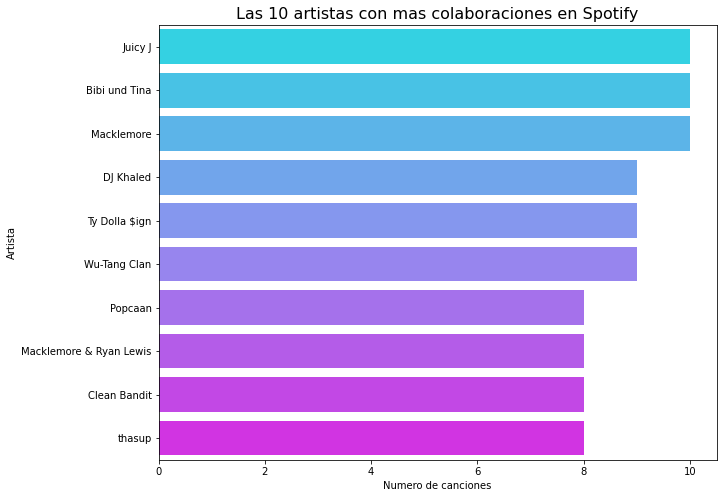

In [40]:
# genero una grafica del dataframe de los 10 mas altos

plt.figure(figsize = (10,8))

fig = sns.barplot(y = 'artist', x = 'count', data = df_topten_colab, palette='cool')

fig.set(xlabel = 'Numero de canciones', ylabel = 'Artista')

fig.set_title('Las 10 artistas con mas colaboraciones en Spotify', fontsize = 16)

plt.show()

- ¿Cuál es el número de canciones en los que ha colaborado el artista que ocupa el primer lugar en el ranking?
- ¿Cuál es el artista que ocupa el décimo lugar en el ranking y en cuántas canciones ha colaborado?

*Los artistas en el primer lugar en el ranking de mas colaboraciones son Juicy J, Bibi und Tina y Macklemore con 10 canciones cada uno.*

*Los artistas en décima lugar son thasup, Clean Bandit, Macklemore & Ryan Lewis, y Popcaan con 8 canciones cada uno.*


- Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:
    - ¿Qué tipo de álbumes tienden a tener más vistas en promedio?
    - ¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?
    - ¿Existen valores atípicos (outliers) en alguna categoría de álbumes?
    - ¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

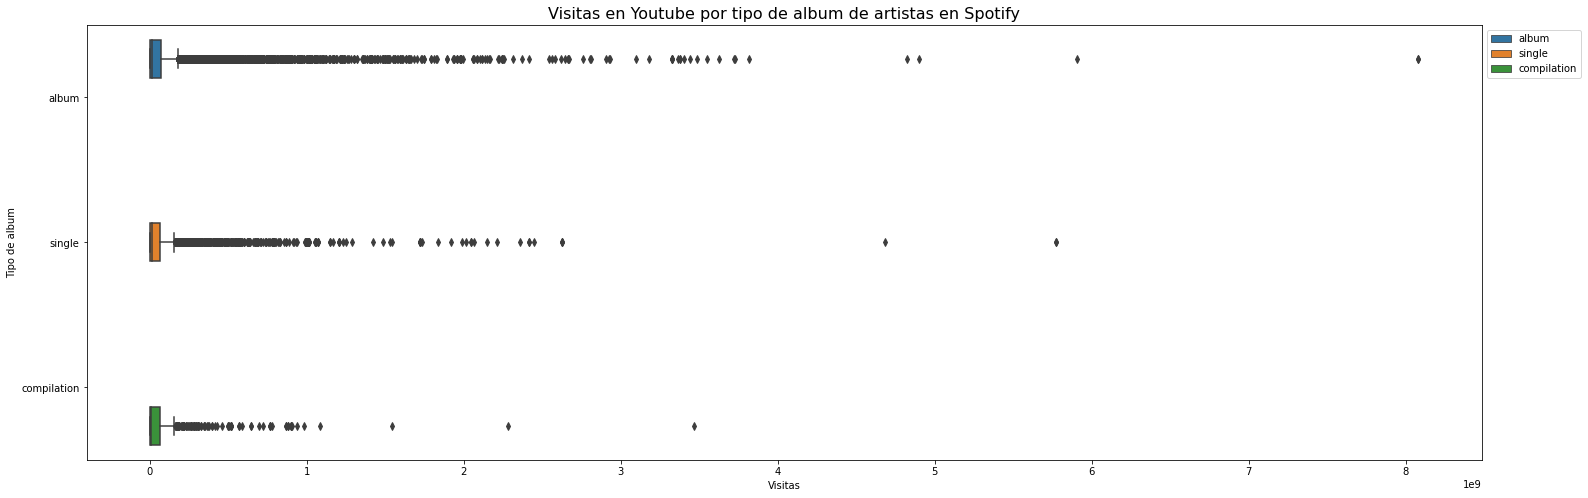

In [41]:
# creo un boxplot categorizado con hue; he intentado con catplot pero es mas dificil controlar el tamaño para sea legible
plt.figure(figsize=(25,8))

fig = sns.boxplot(y = 'album_type', x = 'views', data = df, hue = 'album_type')

fig.set_title('Visitas en Youtube por tipo de album de artistas en Spotify', fontsize=16)
fig.set(xlabel = 'Visitas', ylabel = 'Tipo de album')
plt.legend(bbox_to_anchor = (1,1))

plt.show()

*Estos boxplots nos muestran una gran variación de los datos de cada tipo de album, sobre todo los de tipo 'album'. A esta escala el rango intercuartílico de cada tipo son similares en tamaño, mostrando que la mayoria de canciones reciben un numero de visitas relativamente bajo independientemente del tipo de album. Sin embargo, podemos ver que el número de visitas a canciones del tipo 'album' tiene una distribución mas dispersa. Dentro de esta categoría hay mas canciones que reciben una cantidad de visitas muy altas o extremademente altas, que podemos ver por la alta cantidad de valores átipicos. Debido a la amplia escala en el eje X, causada por los valores atípicos en los grupos álbum y single, es difícil comparar las medias que son de valores relativamente bajos y similares. De todas formas, por las cantidades de valores átipicos visibles, podemos deducir que la categoria de tipo 'album' recibe los numeros de visitas mas altos, seguida del tipo single y a continuación el tipo compilaciones.*

<Figure size 432x288 with 0 Axes>

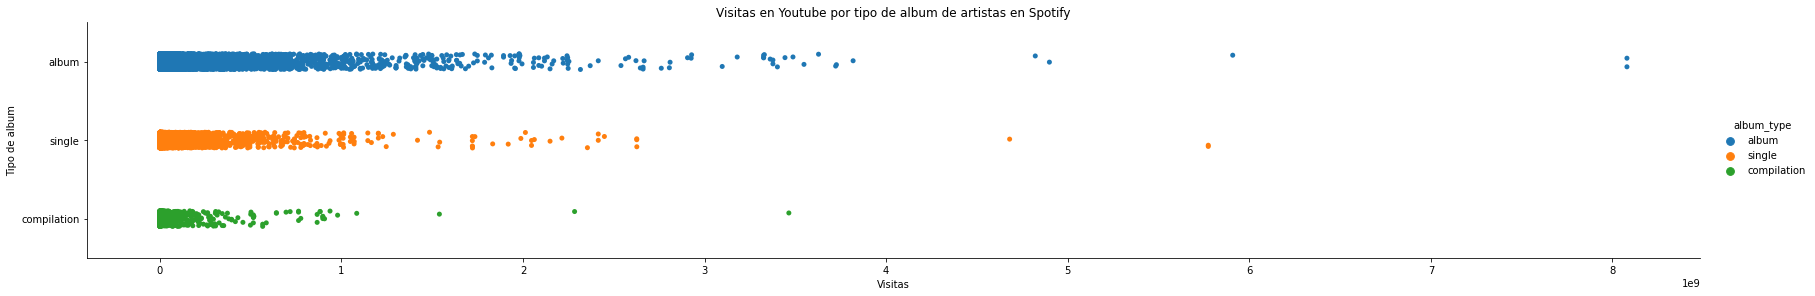

In [42]:
plt.figure()

fig = sns.catplot(y = 'album_type', x = 'views', data = df, hue = 'album_type', height = 4, aspect = 6)

plt.title('Visitas en Youtube por tipo de album de artistas en Spotify')
fig.set(xlabel = 'Visitas', ylabel = 'Tipo de album')

plt.show()

*Para explorar mas los datos, he graficado un 'strip plot'. Este muestra de otra forma la alta dispersión de los datos, sobre todo para las categorías 'album' y 'single', y la concentracion de estos en los valores de visitas mas bajos.*

In [43]:
# genero un dataframe con unos estadísticos que me pueden ayudar a analizar los datos
df_group_albumtype = df.groupby('album_type')['views'].agg(['sum', 'mean', 'std', 'var'])
df_group_albumtype['coeficiente de variacion'] = df_group_albumtype['std']/df_group_albumtype['mean']
df_group_albumtype

,sum,mean,std,var,coeficiente de variacion
album_type,,,,,
album,"1,438,910,059,139.00","98,427,393.06","285,893,289.88","81,734,973,199,261,104.00",2.90
compilation,"61,226,486,759.00","79,618,318.28","219,674,148.21","48,256,731,391,667,000.00",2.76
single,"401,916,456,409.00","82,698,859.34","246,102,325.88","60,566,354,802,519,992.00",2.98


In [44]:
# calculo la diferencia entre la media de la 'categoria' album y la categoria 'compilation'.
(df_group_albumtype.loc['album','mean'] - df_group_albumtype.loc['compilation','mean']) / df_group_albumtype.loc['album','mean']

0.19109593572253997

In [45]:
# calculo la diferencia entre la media de la categoria 'single' y la categoria 'compilation'.
(df_group_albumtype.loc['single','mean'] - df_group_albumtype.loc['compilation','mean']) / df_group_albumtype.loc['single','mean']

0.03725010339548584

*Como no se puede distinguir muy bien la media en los boxplot, he generado un dataframe con los valores numericos para poder comparar la media y variacion de las tres categorias. Ahora podemos ver que la media de la categoria 'album' es un 19% mas alta que la de 'compilation'. Las medias de 'compilation' y 'single' son similares, con solo un 4% de diferencia en su valor entre ellas. Sin embargo, si comparamos las coeficientes de variación, los datos de la categoria 'single' son relativamente más dispersos que los del tipo 'album'.*